<h1 style="text-align:center">
    Data Science project: Movie dataset
</h1>

<br>

<font color="darkblue">

   
<h3 style="text-align:center">
    27/10/2024
</h3>

<hr>

# Introduction


This data science project, developed through Python, is based on multiple basic analyses on a IMDb movie dataset, found in Kaggle:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset


The first sections will be developed without using Pandas, in order to practise basic Python.
<br>

# Starting point

The before mentioned dataset has been downloaded and saved as 'movie_data.csv', and will be used from now one with that notation.


# Libraries and global constants

In [5]:
# Libraries:
import csv
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
from mrjob.job import MRJob
from mrjob.step import MRStep
from sklearn import linear_model

In [6]:
# Global constants
MOVIES_DATA = './data_in/movie_data.csv'
FEW_FIELDS = "algunos_campos.txt"
plt.style.use('_mpl-gallery')

# Part A. Basic analyses without Pandas

### A.1. Basic initial exploration of the dataset.

Let's charge the dataset, separating the header and the rows containing the data.


In [10]:
def load_full_data(full_data):
    """
    Loads the data from a CSV file, separating the header (column names) from the rest of the data rows.
    
    Parameters
    ----------
    full_data : str
        Path to the .csv file that will be loaded. Encoding must be specified to avoid potential decoding issues. 
        
    Returns
    -------
    full_header : list
        Column names (header) of the input .csv file.
    full_list_data : list
        List containing the rest of the data rows of the .csv file.

    Examples
    -------
    load_full_data('movies_dataset')
    """
    with open(full_data, 'r', encoding = 'utf-8') as csvfile: # Specified the encoding to avoid reading issues.
        reader = csv.reader(csvfile)
        full_header = next(reader)
        full_list_data = [row for row in reader]
        
    return full_header, full_list_data


In [11]:
# Functioning

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

We would like to see the positions of the identifiers on the header

In [13]:
list_of_enumerated_headers = list(enumerate(full_header))
print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


### A.2. Main columns of a movie
Let's extract only some of the columns we are interested in: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` and `movie_imdb_link`.

In [15]:
def main_data_from_item(item):
    """
    Extracts particular fields from a given row (item) of a movie dataset, based on predefined column positions.
    
    Parameters
    ----------
    item : list
        A row of data from the dataset that wants to be analysed.

    Returns
    -------
    main_data : list
        A list of the selected data fields from the input row (item). The list contains elements from specific columns based on predefined positions (in brackets):  
            - Movie title [11]
            - Year of release [23]
            - Director name [1]
            - Actor 1 name [10]
            - Language [19]
            - Country [20]
            - Color [0]
            - Budget [22]
            - IMDb score [25]
            - IMDb link [17]
    Examples
    -------
    main_data_from_item(lista)
    """
    positions = [11, 23, 1, 10, 19, 20, 0, 22, 25, 17]
    main_data = [item[i] for i in positions]
    return main_data


In [16]:
# Functioning

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


### A.3. Improving the data

There are multiple anomalies for many entries of the dataset. Let's treat the year and the budget as integers, and the ratings as floats. If these values are empty, let's assign a '-1' to them. Moreover, let's eliminate the final fragment of the url, started as '?ref'


In [19]:
def datatypes_arranged(datatypes):
    """
    Cleans and arranges data types for specific fields of a movie dataset.

    Parameters
    ----------
    datatypes : list
        A list of data extracted from a movie entry, containing the following elements in this order:
            - Movie title
            - Year of release
            - Director name
            - Actor 1 name
            - Language
            - Country
            - Color
            - Budget
            - IMDb score
            - IMDb link

    Returns
    -------
    arranged_data : list
        A cleaned list with the following data types and corrections applied:
            - Movie title (str): without whitespaces and the possible '\xa0' anomaly
            - Year of release (int): defined as -1 if not provided
            - Director name (str)
            - Actor 1 name (str)
            - Language (str)
            - Country (str)
            - Color (str)
            - Budget (int): defined as -1 if not provided
            - IMDb score (float)
            - IMDb link (str): cleaned without the '?ref_=' fragment
    Examples
    -------
    datatypes_arranged(pirates_of_the_caribbean)
    """
    title = datatypes[0].strip().replace('\xa0', '')
    year = int(datatypes[1]) if datatypes[1] else -1
    director = datatypes[2]
    actor_1 = datatypes[3]
    language = datatypes[4]
    country = datatypes[5]
    color = datatypes[6]
    budget = int(datatypes[7]) if datatypes[7] else -1
    score = float(datatypes[8])
    link = re.sub(r'\?ref_.*', '', datatypes[9])
    
    arranged_data = [title, year, director, actor_1, language, country, color, budget, score, link]
    
    return arranged_data

    


In [20]:
# Functioning

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))


['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


### A.4. Retrieving basic information

<br>

Functions to retrieve the following information will be created:

<itemize>
    <li> - The possible options for the column 'Color'
    <li> - The cleaned movie titles, alongside the number of qualifications, that contain the word 'Victor'.
</itemize>

In [22]:
colores = set(map(lambda movie: movie[0], full_list_data))

pelis_victor = list(map(lambda movie: 
                        (movie[11].strip().replace('\xa0', ''),
                         int(movie[2]) if movie[2].isdigit() else 0),
                         filter(lambda movie: 'Victor' in movie[11].strip().replace('\xa0', ''),
                         full_list_data)))


In [23]:
# Functioning

print(colores)
print(pelis_victor)

{'', 'Color', ' Black and White'}
[('Victor Frankenstein', 159), ('Victor Frankenstein', 159), ('The Young Victoria', 188), ('Victor Frankenstein', 159), ('Raising Victor Vargas', 59)]


# B. Dictionary data

### B.1. Load only the data that will be used


We will create a function that will follow each line of our dataset and retain the information that is of interest to us. This information will be loaded in a dictionary which keys will be the title ('titulo') and year (año). 

Moreover, because the title and the year of each movie is repeated through the dataset, we will register only the first time one movie appears.


In [25]:
def load_main_data(main_data):
    """
    Loads the values of main interest from a movie .csv, generating a dictionary which keys are the title and the year of the movie, 
    and the values are the rest of our main interest values such as its director, language, etc.
    
    Parameters
    ----------
    main_data : str
        Path to the .csv file that will be loaded. Encoding must be specified to avoid potential decoding issues. 

    Returns
    -------
    main_header : list
        Column names (header) of the input .csv file.
    main_dict_data : dict
        Dictionary of the selected movies. Keys are (title, year), and the values are the rest of our main interest values.
        
    Examples
    -------
    load_main_data(my_dataset)
    """
    main_dict_data = {}
    
    with open(main_data, 'r', encoding = 'utf-8') as csvfile: 
        csv_reader = csv.reader(csvfile)
        main_header = next(csv_reader)
        
        for row in csv_reader:
            arranged_row = datatypes_arranged(main_data_from_item(row)) # Applies our previous functions to clean the data
            title_year = (arranged_row[0], arranged_row[1]) 
            if title_year not in main_dict_data: 
                main_dict_data[title_year] = arranged_row[2:] 

    return main_header, main_dict_data


In [26]:
# Functioning

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', 2012)  ->  ['Christo

We can now delete the variable `full_list_data`

In [28]:
del full_list_data

### B.2. Retrieving some information

Let's design a function that assesses which movies have been directed by a director of our choice.


In [30]:
def movies_anno_for_director(dictionary, director):
    """
    Returns the movies, with their release date, directed by a particular director.
    
    Parameters
    ----------
    dictionary : dict
        Dictionary with the keys (title, year) and values that include the rest of the movie information.
    director : str
        Director's name to be searched.

    Returns
    -------
    result : list of tuples
        List with the tuples (title, year) of the movies directed by the requested director.
        
    Examples
    -------
    movies_anno_for_director(my_dict, 'Quentin Tarantino')
    
    """
    movie_year = []
    
    for key in dictionary:
        title, year = key
        movie_data = dictionary[key]
    
        if movie_data[0] == director:
            movie_year.append((title, year))
            
    if movie_year:
        return movie_year
    else:
        return print('That director is not in the database.')


In [31]:
# Functioning
    
movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', 2009),
 ('Titanic', 1997),
 ('Terminator 2: Judgment Day', 1991),
 ('True Lies', 1994),
 ('The Abyss', 1989),
 ('Aliens', 1986),
 ('The Terminator', 1984)]

Which director has directed the most movies?

In [33]:
def directors_max_movies(movies):
    """
    Given a movie dictionary, returns the director that has directed the most movies.

    Parameters
    ----------
    movies : dict
        Dictionary with the keys (title, year) and values that include the rest of the movie information.

    Returns
    -------
    tuple
        A tuple that contains the director that has directed the most movies, and that number of movies.
        
    Examples
    -------
    directors_max_movies(my_dict)
    """
    directors_count = {}
    
    for key in movies:
        values = movies[key]
        director = values[0]  
            
        if director and director.strip():
            if director in directors_count:
                    directors_count[director] += 1
            else:
                    directors_count[director] = 1
    
    max_movies = max(directors_count.values())
    top_directors = [director for director, count in directors_count.items() if count == max_movies]
    
    return top_directors, max_movies



In [34]:
# Functioning
    
print(directors_max_movies(main_dict_data))

(['Steven Spielberg'], 26)


For each year in a given year interval, how many movies have been produced?

In [36]:
def years_num_movies(movies, start_year, end_year):
    """
    Counts the number of movies produced yearly in a given interval.
    
    Parameters
    ----------
    movies : dict
        Dictionary with the keys (title, year) and values that include the rest of the movie information.
        
    start_year : int
        Starting year of the interval to assess.
    end_year : int
        Finishing year of the interval to assess.

    Returns
    -------
    dict
        A dictionary with the years as keys and the numbers of movies produced that year as values, inside a given year interval.
        
    Examples
    -------
    years_num_movies(my_dict, 1990, 2007)
    """
    year_count = {}

    for title_year in movies.keys():
        year = title_year[1] 
        
        if start_year <= year <= end_year:
            if year in year_count:
                year_count[year] += 1
            else:
                year_count[year] = 1

    return year_count


In [37]:
# Functioning
    
num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2009: 253, 2007: 198, 2015: 211, 2012: 214, 2010: 225, 2006: 235, 2008: 223, 2013: 231, 2011: 224, 2014: 243, 2005: 216, 2004: 207, 2003: 169, 2001: 183, 2002: 204, 2000: 169}


In [38]:
key_years = list(num_movies.keys())
key_years.sort()

num_movies_sorted = {year: num_movies[year] for year in key_years}


In [39]:
# Functioning
    
print(num_movies_sorted)

{2000: 169, 2001: 183, 2002: 204, 2003: 169, 2004: 207, 2005: 216, 2006: 235, 2007: 198, 2008: 223, 2009: 253, 2010: 225, 2011: 224, 2012: 214, 2013: 231, 2014: 243, 2015: 211}


Let's design an operation that, using our main dictionary, saves the following data of each movie, without the header: title, language, year, country and budget. The separator will be a ' | ', and the file name will be:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [41]:
def store_file(movies, file_name):
    """
    Stores the selected data of each movie dataset, without the header, in a .txt file
    Selected data is: title, year, language, country, and budget. The resulting separator is '|'.

    Parameters
    ----------
    movies : dict
        Dictionary with the keys (title, year) and values that include the rest of the movie information.
        
    file_name : str
        Name of the file where the selected data will be stored.
        
    Returns
    -------
    file
        A .txt file that contains the formated data.
        
    Examples
    -------
    tore_file(my_dict, MY_FILE)
    """
    with open(file_name, 'w', encoding='utf-8') as file:
        for (title, year), data in movies.items():
            language = data[2]  
            country = data[3]   
            budget = data[5]    
            
            file.write(f"{title}|{year}|{language}|{country}|{budget}\n")


In [42]:
# Functioning

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 9A9B-F92B

 Directorio de C:\Users\User\Desktop\Movie_Dataset_DS_project

27/10/2024  17:57           210.855 algunos_campos.txt
               1 archivos        210.855 bytes
               0 dirs  230.343.266.304 bytes libres

Avatar|2009|English|USA|237000000

Pirates of the Caribbean: At World's End|2007|English|USA|300000000

Spectre|2015|English|UK|245000000

The Dark Knight Rises|2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|||-1



### B.3. A count using `defaultdict`
We wish to know with which directors, and how many times, has each actor performed as part of the main cast. Let's perform this count using a `defaultdict`, which keys will be the actor names and the values will have the `defaultdict` structure, which keys will be the names of the directors and the values the times that have performed.


In [44]:
def actor_directors(movies):
    """
    Counts how many times each actor of the dataset has been featured in a movie from each director.
    Stores this information using a defaultdict.
    
    Parameters
    ----------
    movie_data : dict
        Dictionary with the keys (title, year) and values that include the rest of the movie information.
    
    Returns
    -------
    collaborations : defaultdict
        A defaultdict where keys are the names of each main actor and the values are nested defaultdicts which keys are the names of the directors
        and the number of times that each main actor has worked with that director.
        
    Examples
    -------
    actor_directors(my_dict)
    """
    
    collaborations = defaultdict(lambda: defaultdict(int))
    
    for key, values in movies.items():
        title, year = key
        director = values[0]
        actor_1 = values[1]
        
        collaborations[actor_1][director] += 1
    return collaborations

In [45]:
# Functioning

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x000002A593333420>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

### B.4. Selected print

There is too much information. We wish to print only, for each actor, the collaborations that surpass certain minimum, as specified.

In [47]:
def print_collaborations_above_min(collaborations, min_collaborations):
    """
    Prints the collaborations among actors and directors that surpas the specified minimum value.
    
    Parameters
    ----------
    collaborations : defaultdict
        A defaultdict where keys are the names of each main actor and the values are nested defaultdicts which keys are the names of the directors
        and the number of times that each main actor has worked with that director.

    min_collaborations : int
        The minimum number of collaborations to surpass in order to show the results.
        
    Returns
    -------
    str
        Prints the resulting collaborations.
        
    Examples
    -------
    print_collaborations_above_min(my_dict, 2)
    """

    result = {}
    for actor, director_collabs in collaborations.items():
        filtered_directors = [(director, count) for director, count in director_collabs.items() if count > min_collaborations]
        
        if filtered_directors:
            result[actor] = filtered_directors

    for actor, collabs in result.items():
        print(f'{actor} -> {collabs}')


print_collaborations_above_min(num_collaborations, 4)

Johnny Depp -> [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio -> [('Martin Scorsese', 5)]
Robert De Niro -> [('Martin Scorsese', 7)]
Bill Murray -> [('Wes Anderson', 5)]
Clint Eastwood -> [('Clint Eastwood', 10)]
Woody Allen -> [('Woody Allen', 10)]


# C. Simple plots


### C.1 Creating a model of a plot

Here, a function to design a simple plot  that takes a list of pair values and, optionally, the labels for the title and both axis.

In [49]:
def representar_xxx_yyy(lista_pares, rotulos = None):
    """
    Represents a lineplot from a given list of pairs (x, y). Plot title and axis names can be also provided.
    
    Parameters
    ----------
    lista_pares : list of tuples
        A list of pairs (x, y) where the first element of each tuple represents a coordinate of the X axis 
        and the second element represents a coordinate of the Y axix
    rotulos : list, optional
        A list made from three strings [title, Y axis label, X axis label] that is only shown if provided.
        
    Returns
    -------
    This function displays a plot but does not return any value.
        
    Examples
    -------
    representar_xxx_yyy([(1, 2), (2, 4), (3, 6)], ['Título', 'EjeY', 'EjeX']
    """
    x = []
    y = []
    
    for a, b in lista_pares:
        x.append(a)
        y.append(b)
        
    plt.figure(figsize=(6, 3))
    
    if rotulos is not None:
        title = rotulos[0]
        label_y = rotulos[1]
        label_x = rotulos[2]
    
        plt.title(str(title), fontsize = 10)
        plt.xlabel(str(label_x), fontsize= 10)
        plt.ylabel(str(label_y), fontsize= 10)  
        
    plt.xticks(rotation = 45)
    plt.plot(x, y) 
    plt.show()


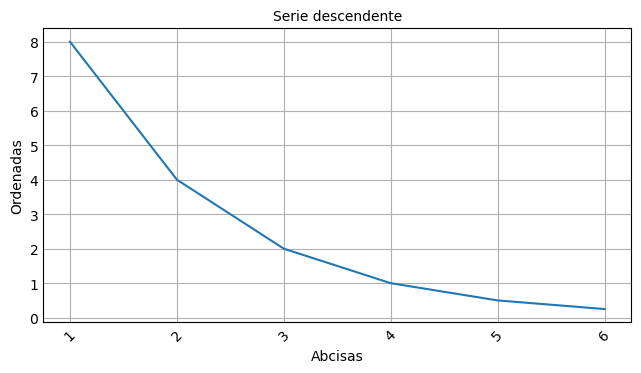

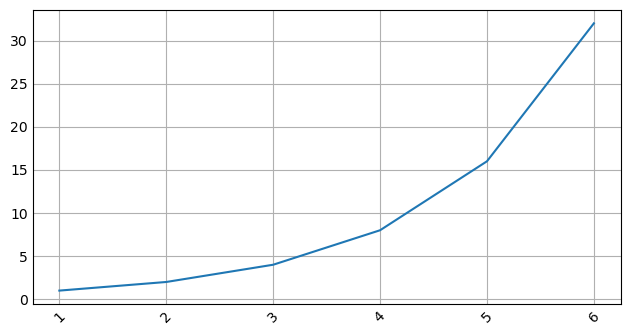

In [50]:
# Functioning

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### A particular plot

Let's represent the number of movies from our database produced in a certain year interval.

In [52]:
def repr_movies_years(movie_dataset, start_year, end_year):
    """
    Plots a lineplot of the number of movies produced yearly during a provided year range.
    
    Parameters
    ----------
    movie_dataset : dict
        Dictionary with the keys (title, year) and values that include the rest of the movie information.
    start_year : int
        Starting year of the interval to assess.        
    end_year : int
        Final year of the interval to assess.
    
    Returns
    -------
        This function displays a plot but does not return any value.

    Details
    --------
    - It uses the previously defined 'years_num_movies' to obtain the dictionary counting the number of movies produced yearly in the given interval.
    - Years are sorted in an increasing order.

    
    Examples
    -------
    repr_movies_years(my_dict, 1990, 2000)
    """

    movies_dict = years_num_movies(movie_dataset, start_year, end_year) 
    key_years = list(movies_dict.keys())
    key_years.sort()

    num_movies_sorted = {year: movies_dict[year] for year in key_years}
    x = num_movies_sorted.keys()
    y = num_movies_sorted.values()
    
    plt.figure(figsize=(6, 3))

    plt.title('Number of movies in our database', fontsize = 10)
    plt.xlabel('years', fontsize= 10)
    plt.ylabel('num. movies in a year', fontsize= 10)  
    
    plt.xticks(ticks=range(start_year, end_year + 1),rotation = 45)
    plt.plot(x, y) 
    plt.show()


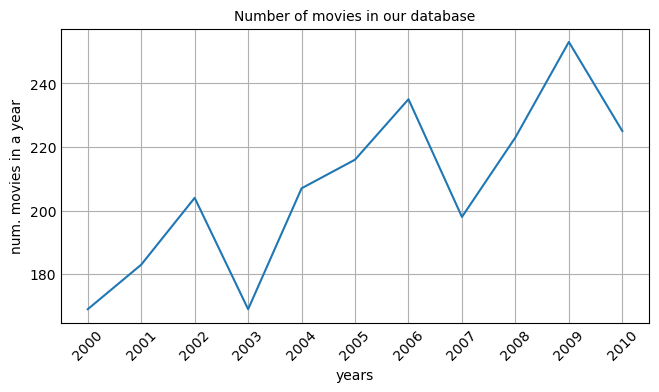

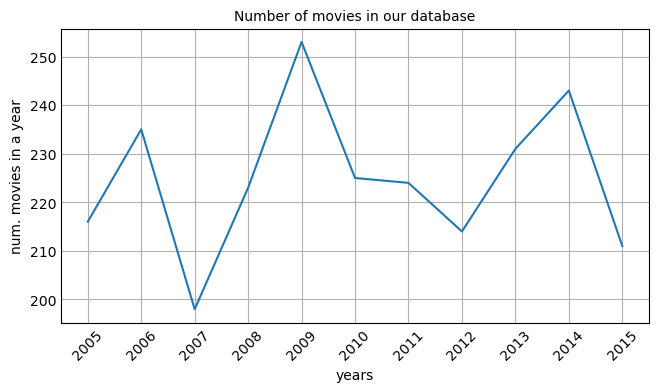

In [53]:
# Functioning

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

# D. IMDb urls and webscrapping

### D.1. Retrieval of the urls

We want to retrieve all the *urls* of our movie database.

In [55]:
main_header, main_dict_data = load_main_data(MOVIES_DATA)

urls = []
for url in main_dict_data.values():
    urls.append(url[-1])

first_url_movie = urls[0]
first_ten_urls = urls[:10]


In [56]:
# Functioning

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [57]:
# A way to avoid the error "Requests 403 forbidded" when webscrapping

def requests_forbidden_solver(url):
    """
    Returns a url avoiding the "Requests 403 forbidden" error when web scrapping.
    
    Parameters
    ----------
    url : str
        String containing the url that we want to scrap.

    Details
    --------
    - The possible errors are defined in the HEADERS dictionary.
    - If there are another errors, a message will be printed indicating its code.
    - Uses the 'requests' library.
    
    Returns
    -------
    str
        The resulting url free of the error code 403.
        
    Examples
    -------
    requests_forbidden_solver('https://www.imdb.com/')
    """
    HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

    response = requests.get(url, headers=HEADERS)
    return response

### D.2. Loading the structure of an url

We wish to extract the `html` code from a movie.

In [59]:
def soup_movie(url):
    """
    Extracts the html content of a website using BeautifulSoup and getting over the 403 error Forbidden.
    
    Parameters
    ----------
    url : str
        String containing the url that we want to scrap.
    
    Returns
    -------
    website_extracted : Text file
        Contains the html code of the requested website, parsed as lxml.

    Details
    --------
    - Uses the previously defined `requests_forbidden_solver` function to obtain the website avoiding the 403 forbidden error. 
    
    Examples
    -------
    soup_movie('https://www.imdb.com/')
    """
    url = requests_forbidden_solver(url) 
    website_extracted = BeautifulSoup(url.content, 'lxml')    
    return website_extracted

In [60]:
# Functioning

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1730048224014);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and pr

### D.3. Extracting informative pieces from the url

And now, from that code, we will extract the folowing information, refering to the movie `first_url_movie`:
- Full movie title

- Description

- List of actors from the main cast

- Budget



In [62]:
soup = soup_movie(first_url_movie)

titulo = soup.title
description = soup.find('meta', attrs={'name': 'description'})
actors = soup.find_all('a', {'data-testid': 'title-cast-item__actor'})
cast = [actor.get_text(strip=True) for actor in actors]
budget = soup.find(string="Budget").find_next('div').get_text(strip=True)

print(titulo)
print()
print(description.get('content'))
print()
print(cast)
print()
print(budget)

<title>Avatar (2009) - IMDb</title>

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']

$237,000,000 (estimated)


### D.4. Actors from the main cast in a url list

Creating a new file containing the main actors from the IMDb movies, given a url list.

In [64]:
def gather_actors(file_name, urls):
    """
    Given a list of IMDb movies urls, obtain the main actors of the movies and saves them in a .txt file.
    
    Parameters
    ----------
    file_name : str
        Name of the file where the actor cast will be saved.
    urls : list
        List of IMDb urls.
    
    Returns
    -------
    file_name : text file
        File containing the main actors of the movies, with the input name.
        
    Examples
    -------
    gather_actors('MY_FILE', my_url_list[:4])
    """
    with open(file_name, 'w', encoding='utf-8') as file:
        for url in urls:
            soup = soup_movie(url)
            actors = soup.find_all('a', {'data-testid': 'title-cast-item__actor'})
            cast = [actor.get_text(strip=True) for actor in actors]

            for actor in cast:
                file.write(actor + "\n")



In [65]:
# Functioning

gather_actors("actors_3_first_movies.txt", urls[:3])

! type actors_3_first_movies.txt

Sam Worthington
Zoe Saldana
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Johnny Depp
Orlando Bloom
Keira Knightley
Geoffrey Rush
Jack Davenport
Bill Nighy
Jonathan Pryce
Lee Arenberg
Mackenzie Crook
Kevin McNally
David Bailie
Stellan SkarsgÃ¥rd
Tom Hollander
Naomie Harris
Martin Klebba
David Schofield
Lauren Maher
Dermot Keaney
Daniel Craig
Christoph Waltz
LÃ©a Seydoux
Ralph Fiennes
Monica Bellucci
Ben Whishaw
Naomie Harris
Dave Bautista
Andrew Scott
Rory Kinnear
Jesper Christensen
Alessandro Cremona
Stephanie Sigman
Tenoch Huerta
Adriana Paz
Domenico Fortunato
Marco Zingaro
Stefano Elfi DiClaudia


# E. Pandas 

### E.1. Loading our file as a dataframe

In [67]:
def load_dataframe(csv):
    """
    Given a .csv file, loads it as a dataframe using Pandas.
    
    Parameters
    ----------
    csv : csv file
        Name of the .csv file that will be converted into a dataframe
  
    Returns
    -------
    db : dataframe
        Dataframe containing the converted csv information.
        
    Examples
    -------
    load_dataframe('MY_MOVIE_DATASET')
    """
    df = pd.read_csv(csv)
    return df


In [68]:
# Functioning

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### E.2. Main table

Using the previous table, let's create a new dataframe that contains just a few columns. 

In [70]:
def fields_selected_dataframe(dataframe):
    """
    Given a movie dataframe, creates a new, smaller dataframe using only the selected columns.
    
    Parameters
    ----------
    dataframe : dataframe
        Name of the dataframe from which the data to create a new dataframe will be obtained.
  
    Returns
    -------
    selected_df : dataframe
        Dataframe containing the information, from the original dataframe, about the movie title, color of the movie, 
        name of the director, language, country of production, name of the main actor, and the link to the IMDb site.
        
    Examples
    -------
    fields_selected_dataframe(my_dataframe)
    """
    selected_df = dataframe[['movie_title', 'color', 'director_name', 'language', 'country', 'actor_1_name', 'movie_imdb_link']]
    return selected_df


In [71]:
# Functioning

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Table columns

Which are the columns from our `tabla_breve`?

In [73]:
tabla_breve.columns

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')

### E.4. Missing cells

Some cells of our dataframe show a `NaN`value. Let's change it for a string: `"Desc"`.

In [75]:
tabla_breve.fillna('Desc')

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


In [76]:
# Functioning

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ movies and number of movies

A function that shows the movie list directed by a given director.

In [79]:
def titulos_de_director_df(df, director):
    """
    Filters a movie dataframe to obtain the movies of a specific director.
    
    Parameters
    ----------
    df : DataFrame
        Dataframe with the movie data. Must contain the "movie_title" and "director_name" columns.
    director : str
        Name of the director from which we want to obtain the movies.

    Returns
    -------
    DataFrame
        A daraframe containing as rows the movies directed by the specified director.
        
    Examples
    -------
    titulos_de_director_df(my_dataframe, 'Quentin Tarantino')
    """
    new_df = df.loc[df['director_name'] == director, ['movie_title']]
    return new_df

In [80]:
# Functioning

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [81]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Let's discover which directors have directed the most number of movies, with that number.

In [83]:
def directors_max_movies_df(df):
    """
    Finds the director that has directed the most movies in our dataframe.
    
    Parameters
    ----------
    df : Dataframe
        The dataframe cointaining the movie data. Must contain the column 'director_name'

    Returns
    -------
    tuple
        A tuple containing a list with the director with the max number of movies directed and that number.
        
    Examples
    -------
    directors_max_movies_df(my_dataframe)
    """
    director_counts = df['director_name'].value_counts()
    max_count = director_counts.max()
    directors_max_movies = director_counts[director_counts == max_count].index.tolist()
    
    return directors_max_movies, max_count

In [84]:
# Functioning

directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)

# Parte F. Massive calculation with map-reduce 

This section is created in a Python file outside of this notebook. 
We will create a program that, being based on the map-reduce tool, calculates, for each language, on which countries movies have been produced, and adds up the whole budget spent on said movies. If one of the variables is not known, that movie won't be accounted for.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

In [86]:
# Let's call the program from the notebook

! python language_budget_countries.py -q algunos_campos.txt

"Aboriginal"	[["Australia","UK"],86000000]
"Arabic"	[["France","Egypt","United Arab Emirates","Turkey"],11225000]
"Aramaic"	[["USA"],30000000]
"Bosnian"	[["USA"],13000000]
"Cantonese"	[["Hong Kong","China"],154500000]
"Chinese"	[["China"],12000000]
"Czech"	[["Czech Republic"],84450000]
"Danish"	[["Denmark"],50100000]
"Dari"	[["Afghanistan","USA"],20046000]
"Dutch"	[["Netherlands"],32150000]
"Dzongkha"	[["Australia"],1800000]
"English"	[["Chile","Poland","Australia","Hungary","Mexico","Greece","Official site","Netherlands","Iceland","Denmark","Switzerland","Germany","New Zealand","Spain","West Germany","Panama","India","Iran","New Line","France","Thailand","Kyrgyzstan","Nigeria","Italy","Romania","Belgium","Philippines","Bulgaria","Japan","Norway","UK","Hong Kong","Ireland","Bahamas","Russia","China","Czech Republic","Georgia","South Africa","USA","South Korea","Brazil","Peru","Aruba","Canada","Libya"],141954875246]
"Filipino"	[["USA"],80000000]
"French"	[["France","UK","Finland","Canad

In [87]:
# Save everything in a file

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

Check out the program from the notebook:

In [89]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
            
print_file("language_budget_countries.py")

from mrjob.job import MRJob
from mrjob.step import MRStep

class Language_Budget_Countries(MRJob):
    
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                   reducer=self.reducer)
        ]
    
    def mapper(self, _, line):
        columns = line.split('|')
        try:
            language = columns[2].strip()
            country = columns[3].strip()
            budget = float(columns[4].strip())
            
            if language and country and budget > 0:
                yield language, (country, budget)
        except (IndexError, ValueError):
            pass  
    
    def reducer(self, language, values):
        country_set = set()  
        total_budget = 0
        
        for country, budget in values:
            country_set.add(country)
            total_budget += budget
        
        country_list = list(country_set)
        yield language, [country_list, int(total_budget)]

if __name__ == '__main__':
    Language_Budget_Cou

# Parte G. Linear regression
<br>
<font color="black">

Now let's perform a simple example of linear regression.

Having seen the data so far, we could think that nowadays, movies spent a higher budget every year, as movies are bigger and of more quality each year.

Thus, let's ask: has the budget for movie production increased during the years? And, moreover, let's predict what will happen in the next 30 years.

</font>

We will define a function that groups the necessary steps.

We start by creating a new dataframe from our initial dataframe containing the movie information. In our example, it is called `tabla_completa`. This new dataframe will contain only our necessary variables to analyse. In our example, `budget`and `title_year`

Next, the variables will be grouped and the average yearly budget calculated.

Then data will be prepared in order to properly visualize it through a scatterplot, to assess the relationship among both variables.

And, finally, the regrerssion model will be adjusted and added to the plot. 

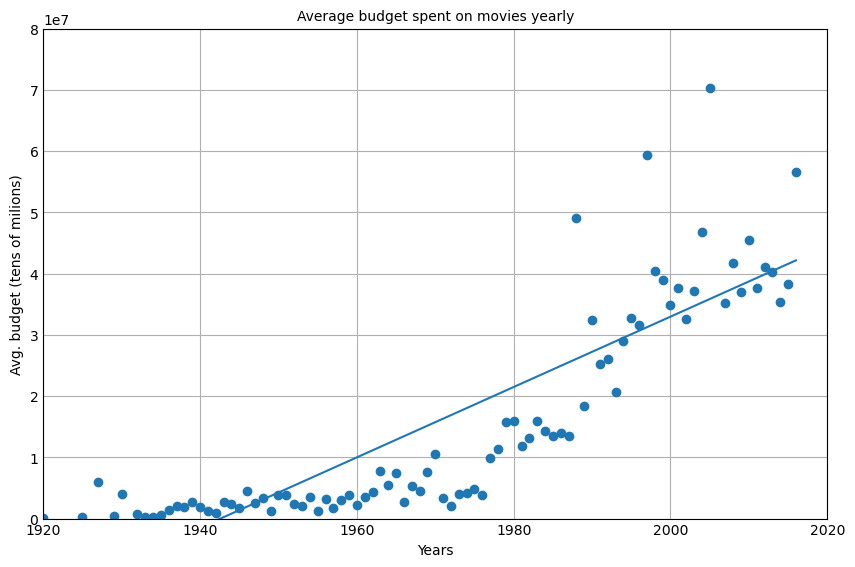

In [92]:
def linear_reg_plot(dataframe, var1, var2, title, xlabel, ylabel):
    """
    Generates a scatter plot with a linear regression line based on two variables from a given movie dataframe.
    
    Parameters
    ----------
    dataframe : dataframe 
        The dataframe containing the data to be plotted. Formated through Pandas.
    var1 : str
        The name of the column in the dataframe representing the independent variable (x-axis).
    var2 : str
        The name of the column in the dataframe representing the dependent variable (y-axis).
    title : str
        The desired title of the plot.
    xlabel : str
        The desired label for the x-axis.
    ylabel : str
        The desired label for the y-axis.
    
    Description
    -----------
    - Filters out negative and NaN values in the specified columns.
    - Groups the data by the independent variable and calculates the mean of the dependent variable.
    - Fits a linear regression model on the grouped data and plots a scatterplot with its regression line.

    Returns
    -------
        This function displays a plot but does not return any value.
    
    Example
    -------
    linear_reg_plot(
        dataframe=tabla_completa, 
        var1='title_year', 
        var2='budget', 
        title='Average budget spent on movies yearly', 
        xlabel='Years', 
        ylabel='Avg. budget (tens of millions)'
    )
    """
    new_df = dataframe[[var1, var2]].copy()
    new_df = new_df[new_df >= 0].dropna() # Drops NaN and negative values
    combined_df = new_df.groupby(var1)[var2].mean().reset_index() # Groups the variables and calculates the average of var2
    
    X = combined_df[var1]
    X = X.values.reshape(-1, 1) # Reescales the variables for the regression model
    y = combined_df[var2]

    plt.figure(figsize=(8, 5)) # Stablishes plot characteristics
    plt.title(title, fontsize = 10)
    plt.xlabel(xlabel, fontsize= 10)
    plt.ylabel(ylabel, fontsize= 10)  
    plt.xlim(1920, 2020)
    plt.ylim(0, 80000000)

    regr = linear_model.LinearRegression() # Creates the linear model
    regr.fit(X,y) # Adjusts it to the regression

    y_predict = regr.predict(X) # Generates predictions of our regression model
    
    plt.plot(X, y_predict) # Plots
    plt.scatter(X,y)
    plt.show()

linear_reg_plot(tabla_completa, 'title_year', 'budget', 'Average budget spent on movies yearly', 'Years', 'Avg. budget (tens of milions)')

Looks like, indeed, there is a positive correlation between budget and the production year. Thus, despite still needing further, stricter statistical analyses, we could affirm that with time, movie production budget has increased.

But, will this tendency be maintaned in the future?

Let's predict this up to 2050.

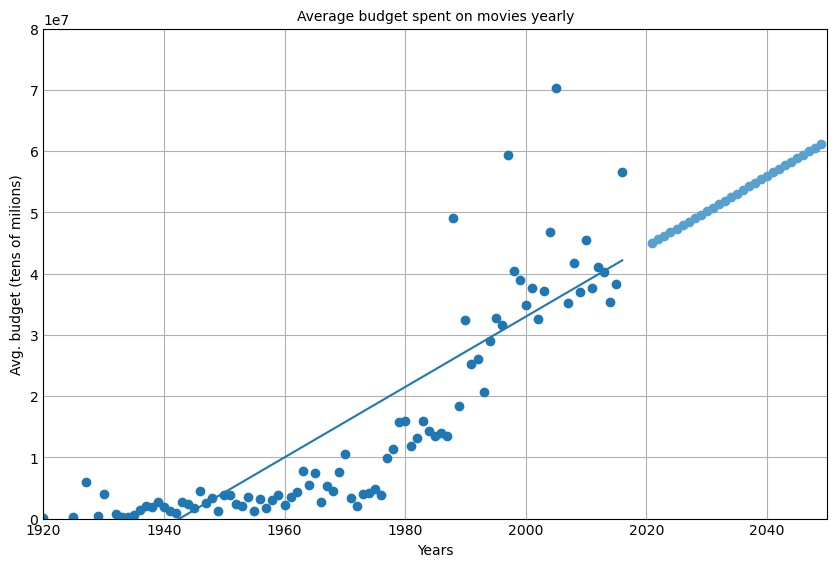

In [94]:
def future_linear_reg_plot(dataframe, var1, var2, year1, year2, title, xlabel, ylabel):
    """
    Generates a scatter plot with a linear regression line based on two variables from a given movie dataframe, and predicts the future tendency.
    
    Parameters
    ----------
    dataframe : dataframe 
        The dataframe containing the data to be plotted. Formated through Pandas.
    var1 : str
        The name of the column in the dataframe representing the independent variable (x-axis).
    var2 : str
        The name of the column in the dataframe representing the dependent variable (y-axis).
    year1 : int
        Initial year considered for our future prediction range.
    year2 : int
        Final year considered for our future prediction range.
    title : str
        The desired title of the plot.
    xlabel : str
        The desired label for the x-axis.
    ylabel : str
        The desired label for the y-axis.
    
    Description
    -----------
    - Filters out negative and NaN values in the specified columns.
    - Groups the data by the independent variable and calculates the mean of the dependent variable.
    - Fits a linear regression model on the grouped data and plots a scatterplot with its regression line.
    - Predicts the tendency of the regression given a certain year range.

    Returns
    -------
        This function displays a plot but does not return any value.
    
    Example
    -------
    future_linear_reg_plot(
        dataframe=tabla_completa, 
        var1='title_year', 
        var2='budget',
        year1 = 2021
        year2 = 2050
        title='Average budget spent on movies yearly', 
        xlabel='Years', 
        ylabel='Avg. budget (tens of millions)'
    )
    """
    new_df = dataframe[[var1, var2]].copy()
    new_df = new_df[new_df >= 0].dropna() # Drops NaN and negative values
    combined_df = new_df.groupby(var1)[var2].mean().reset_index() # Groups variables and calculates the average of var2
    
    X = combined_df[var1]
    X = X.values.reshape(-1, 1) # Reescales the variable for the future regression model 
    y = combined_df[var2]
    
    plt.figure(figsize=(8, 5)) # Stablishes plot characteristics
    plt.title(title, fontsize = 10)
    plt.xlabel(xlabel, fontsize= 10)
    plt.ylabel(ylabel, fontsize= 10)  
    plt.xlim(1920, year2)
    plt.ylim(0, 80000000)

    regr = linear_model.LinearRegression() # Creates the linear model
    regr.fit(X,y) # Adjujsts the model to our regression

    y_predict = regr.predict(X) # Generates the model predictions 
    
    X_future = np.array(range(year1, year2)) # Creates an int list for our desired year range 
    X_future = X_future.reshape(-1, 1) # Adjusts
    future_predict = regr.predict(X_future) # Predicts future budget values up until our desired year2
    

    plt.scatter(X,y) # Plots
    regr.fit(X,y)
    plt.plot(X, y_predict)
    plt.scatter(X_future,future_predict) 

future_linear_reg_plot(tabla_completa, 'title_year', 'budget', 2021, 2050, 'Average budget spent on movies yearly', 'Years', 'Avg. budget (tens of milions)')

Light-blue dots show the predicted movie budget until 2050.
Looks like, if the tendency and the rest of the variables are maintaned, movie budget is expected to keep increasing yearly.

# Conclusion
Thank you for following up with the project.

I hope you can find something useful for your own coding.